# Horse-Colic Dataset from UCI Machine Learning Repository

## Importing Train data 

In [100]:
import pandas as pd
columns = ['surgery','Age','Hospital ID','rectal temperature','pulse','respiratory rate','temperature of extremities','peripheral pulse',"mucous membranes",'capillary refill time','pain','peristalsis','abdominal distension','nasogastric tube','nasogastric reflux','nasogastric reflux PH','rectal examination - feces','abdomen',' packed cell volume','total protein','abdominocentesis appearance','abdomcentesis total protein','outcome','surgical lesion?','1','2','3','path']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data', sep = ' ', header = None, na_values='?', names = columns)

In [101]:
df.head()

,surgery,Age,Hospital ID,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,1,2,3,path
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [102]:
len(df.columns)

28

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   surgery                      299 non-null    float64
 1   Age                          300 non-null    int64  
 2   Hospital ID                  300 non-null    int64  
 3   rectal temperature           240 non-null    float64
 4   pulse                        276 non-null    float64
 5   respiratory rate             242 non-null    float64
 6   temperature of extremities   244 non-null    float64
 7   peripheral pulse             231 non-null    float64
 8   mucous membranes             253 non-null    float64
 9   capillary refill time        268 non-null    float64
 10  pain                         245 non-null    float64
 11  peristalsis                  256 non-null    float64
 12  abdominal distension         244 non-null    float64
 13  nasogastric tube    

## Cleaning Train dataset

In [104]:
#Dropping columns having significant number of NaN values
df.drop('nasogastric reflux PH', axis=1, inplace = True)
df.drop('abdomcentesis total protein', axis=1, inplace = True)
df.drop('abdominocentesis appearance', axis=1, inplace = True)
df.drop('nasogastric tube', axis=1, inplace = True)
df.drop('abdomen', axis=1, inplace = True)
df.drop('rectal examination - feces', axis=1, inplace = True)

In [105]:
df['Age'].replace({9:2}, inplace = True)
df['outcome'].replace({1:'lived', 2:'died', 3:'euthenized'}, inplace = True)
df['Age'].replace({1:'Adult', 2:'Young'}, inplace = True)
df['pain'].replace({1:'No Pain', 2:'Depressed', 3:'Mild pain', 4:'Severe Pain', 5:'Greaterthansevere'}, inplace = True)

<AxesSubplot:>

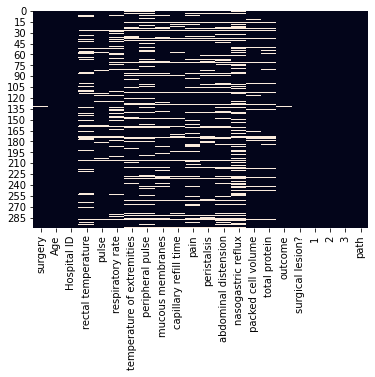

In [106]:
#Heatmap for missing values
sns.heatmap(df.isnull(), cbar=False)

surgery                         1
Age                             0
Hospital ID                     0
rectal temperature             60
pulse                          24
respiratory rate               58
temperature of extremities     56
peripheral pulse               69
mucous membranes               47
capillary refill time          32
pain                           55
peristalsis                    44
abdominal distension           56
nasogastric reflux            106
 packed cell volume            29
total protein                  33
outcome                         1
surgical lesion?                0
1                               0
2                               0
3                               0
path                            0
dtype: int64


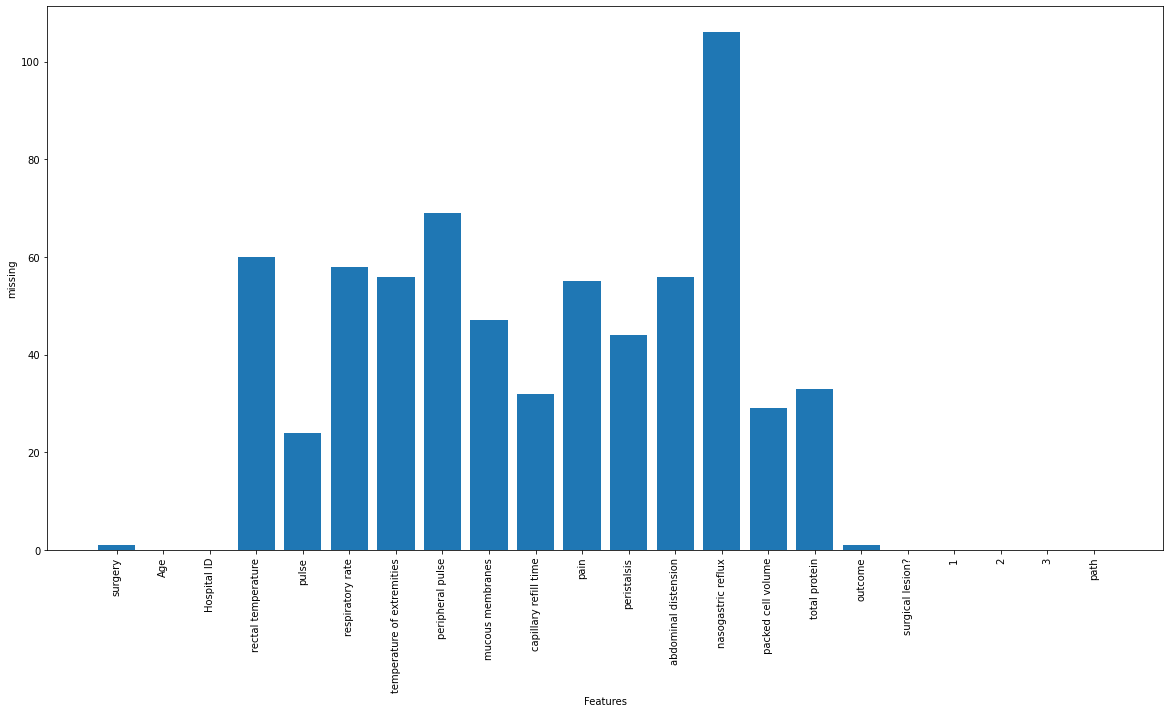

In [7]:
#BarGraph of missing values for clearer visualisation
null = df.isnull().sum()

from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(range(len(null)),null)
plt.xlabel('Features')
plt.ylabel('missing')
plt.xticks(list(range(len(df.columns))), list(df.columns.values), rotation='vertical')
plt.show

print(null)

In [8]:
#Columns containing NaN values
null = pd.concat([df.isnull().sum()], axis = 1, keys = ['NA'] )
null.loc[(null.NA>0)]

,NA
surgery,1
rectal temperature,60
pulse,24
respiratory rate,58
temperature of extremities,56
peripheral pulse,69
mucous membranes,47
capillary refill time,32
pain,55
peristalsis,44


In [9]:
#Filtering columns having continous variables 
for col in df.columns.values:
    if (len(df[col].value_counts())> 5) and (df[col].isnull().sum() > 0):
        print(col)

rectal temperature
pulse
respiratory rate
mucous membranes
 packed cell volume
total protein


In [107]:
#Filling columns containing continous variables with MEAN
df['surgery'].fillna(df['surgery'].mode()[0], inplace = True)
df['rectal temperature'].fillna(df['rectal temperature'].mean(), inplace = True)
df['pulse'].fillna(df['pulse'].mean(), inplace = True)
df['respiratory rate'].fillna(df['pulse'].mean(), inplace = True)
df['mucous membranes'].fillna(df['pulse'].mean(), inplace = True)
df[' packed cell volume'].fillna(df['pulse'].mean(), inplace = True)
df['total protein'].fillna(df['total protein'].mean(), inplace = True)

##Filling columns containing categorical variables with MODE
for col in df.columns.values:
    if (df[col].isnull().sum()>0):  
        if (df[col].dtype == 'float64'):
            df[col].fillna(df[col].mode()[0], inplace = True)

In [108]:
null = pd.concat([df.isnull().sum()], axis = 1, keys = ['NA'])
null.loc[(null['NA']>0)]               

,NA
pain,55
outcome,1


# For a better insight and efficiency let's find correlation between features and "outcome" which is our target variable

lived         178
died           77
euthenized     44
Name: outcome, dtype: int64


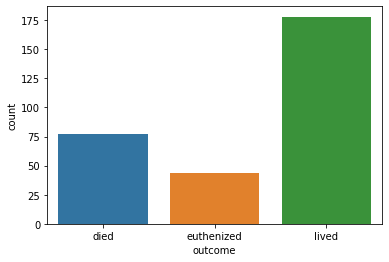

In [109]:

import seaborn as sns
sns.countplot(data=df, x="outcome");
print(df.outcome.value_counts())

<AxesSubplot:xlabel='outcome', ylabel='count'>

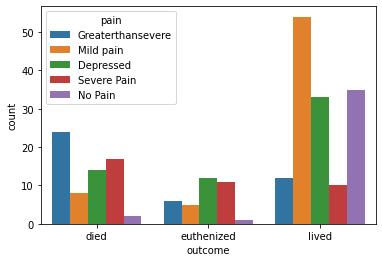

In [14]:
#Finding relations between features and taget variable(outcome) by visualising data
#Relation between outcome and degree of pain experienced by the horse
sns.countplot(data=df, x='outcome', hue = 'pain')


<AxesSubplot:xlabel='outcome', ylabel='count'>

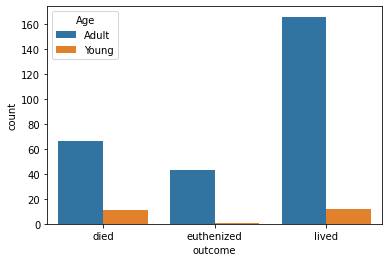

In [15]:
#Relation between outcome and degree of age of the horse

sns.countplot(data=df, x='outcome', hue = 'Age')

## Data Processing for analysis

In [17]:
#Converting variables to categorical datatype for better analysis
df['outcome'] = df['outcome'].astype('category').cat.codes
df['Age'] = df['Age'].astype('category').cat.codes
df['pain'] = df['pain'].astype('category').cat.codes

0.09788936205423254

In [18]:
#Finding correlation between features and target variables
corr= df.corr()

In [19]:
core = abs(corr.outcome.sort_values(ascending = False))
core.sort_values(ascending = False)

outcome                       1.000000
 packed cell volume           0.348252
surgical lesion?              0.335366
pulse                         0.332151
peripheral pulse              0.306622
peristalsis                   0.289940
temperature of extremities    0.285713
abdominal distension          0.273972
capillary refill time         0.258909
total protein                 0.224141
surgery                       0.194000
nasogastric reflux            0.181624
Hospital ID                   0.101846
respiratory rate              0.100203
2                             0.099039
1                             0.098606
Age                           0.097889
path                          0.070761
3                             0.044610
rectal temperature            0.018860
pain                          0.018624
mucous membranes              0.006884
Name: outcome, dtype: float64

<AxesSubplot:>

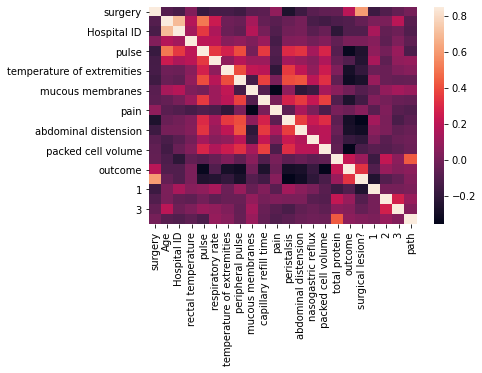

In [163]:
#Heatmap of correlations
sns.heatmap(corr, vmax=0.85)

## This shows that features like pulse, surgical lesion,packed cell volume are having strong relations with our target variable which implies that these features play the most crucial role in classifying the target variable compared to other features. 

In [21]:
#Removing columns which have insignificant impact on our target variable "outcome" (corr<0.9)
df.drop('path',axis = 1 , inplace = True)
df.drop('3',axis = 1 , inplace = True)
df.drop('rectal temperature',axis = 1 , inplace = True)
df.drop('pain',axis = 1 , inplace = True)
df.drop('mucous membranes',axis = 1 , inplace = True)

In [140]:
#Cleaned and processed train dataset
display(df.head())
display(df.shape)

,surgery,Age,Hospital ID,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,abdominal distension,nasogastric reflux,packed cell volume,total protein,outcome,surgical lesion?,1,2,3,path
0,2.0,Adult,530101,38.5,66.0,28.0,3.0,3.0,71.913043,2.0,...,4.0,1.0,45.0,8.4,died,2,11300,0,0,2
1,1.0,Adult,534817,39.2,88.0,20.0,3.0,1.0,4.000000,1.0,...,2.0,1.0,50.0,85.0,euthenized,2,2208,0,0,2
2,2.0,Adult,530334,38.3,40.0,24.0,1.0,1.0,3.000000,1.0,...,1.0,1.0,33.0,6.7,lived,2,0,0,0,1
3,1.0,Young,5290409,39.1,164.0,84.0,4.0,1.0,6.000000,2.0,...,4.0,2.0,48.0,7.2,died,1,2208,0,0,1
4,2.0,Adult,530255,37.3,104.0,35.0,3.0,1.0,6.000000,2.0,...,1.0,1.0,74.0,7.4,died,2,4300,0,0,2


(300, 22)

## Importing Test Dataset

In [111]:
columns = ['surgery','Age','Hospital ID','rectal temperature','pulse','respiratory rate','temperature of extremities','peripheral pulse',"mucous membranes",'capillary refill time','pain','peristalsis','abdominal distension','nasogastric tube','nasogastric reflux','nasogastric reflux PH','rectal examination - feces','abdomen',' packed cell volume','total protein','abdominocentesis appearance','abdomcentesis total protein','outcome','surgical lesion?','1','2','3','path']
dfs = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.test', sep = ' ', header = None, na_values='?', names = columns)

In [112]:
display(dfs.head())
display(len(dfs.columns))
display(dfs.info())
display(dfs.shape)

,surgery,Age,Hospital ID,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,1,2,3,path
0,2.0,1,528626,38.5,54.0,20.0,NaN,1.0,2.0,2.0,...,42.0,6.3,NaN,NaN,1.0,2,3111,0,0,1
1,2.0,1,527950,37.6,48.0,36.0,NaN,NaN,1.0,1.0,...,44.0,6.3,1.0,5.0,1.0,2,3111,0,0,1
2,1.0,1,535263,37.7,44.0,28.0,NaN,4.0,3.0,2.0,...,45.0,70.0,3.0,2.0,1.0,1,3205,0,0,2
3,1.0,1,534523,37.0,56.0,24.0,3.0,1.0,4.0,2.0,...,35.0,61.0,3.0,2.0,3.0,2,2205,2208,0,2
4,2.0,1,528926,38.0,42.0,12.0,3.0,NaN,3.0,1.0,...,37.0,5.8,NaN,NaN,1.0,2,3111,0,0,2


28

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   surgery                      67 non-null     float64
 1   Age                          68 non-null     int64  
 2   Hospital ID                  68 non-null     int64  
 3   rectal temperature           59 non-null     float64
 4   pulse                        66 non-null     float64
 5   respiratory rate             55 non-null     float64
 6   temperature of extremities   59 non-null     float64
 7   peripheral pulse             54 non-null     float64
 8   mucous membranes             67 non-null     float64
 9   capillary refill time        62 non-null     float64
 10  pain                         60 non-null     float64
 11  peristalsis                  60 non-null     float64
 12  abdominal distension         59 non-null     float64
 13  nasogastric tube      

None

(68, 28)

## Cleaning Test dataset

<AxesSubplot:>

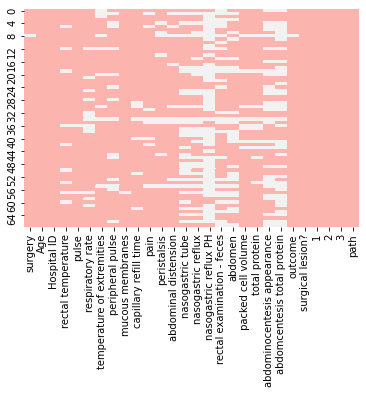

In [182]:
#Visualising missing data
sns.heatmap(dfs.isnull(),cbar=False, cmap='Pastel1')

## White blank spaces account for the missing data in the entire dataframe represented by Pink

surgery                         1
Age                             0
Hospital ID                     0
rectal temperature              9
pulse                           2
respiratory rate               13
temperature of extremities      9
peripheral pulse               14
mucous membranes                1
capillary refill time           6
pain                            8
peristalsis                     8
abdominal distension            9
nasogastric tube               27
nasogastric reflux             27
nasogastric reflux PH          52
rectal examination - feces     26
abdomen                        25
 packed cell volume             8
total protein                  10
abdominocentesis appearance    29
abdomcentesis total protein    37
outcome                         1
surgical lesion?                0
1                               0
2                               0
3                               0
path                            0
dtype: int64


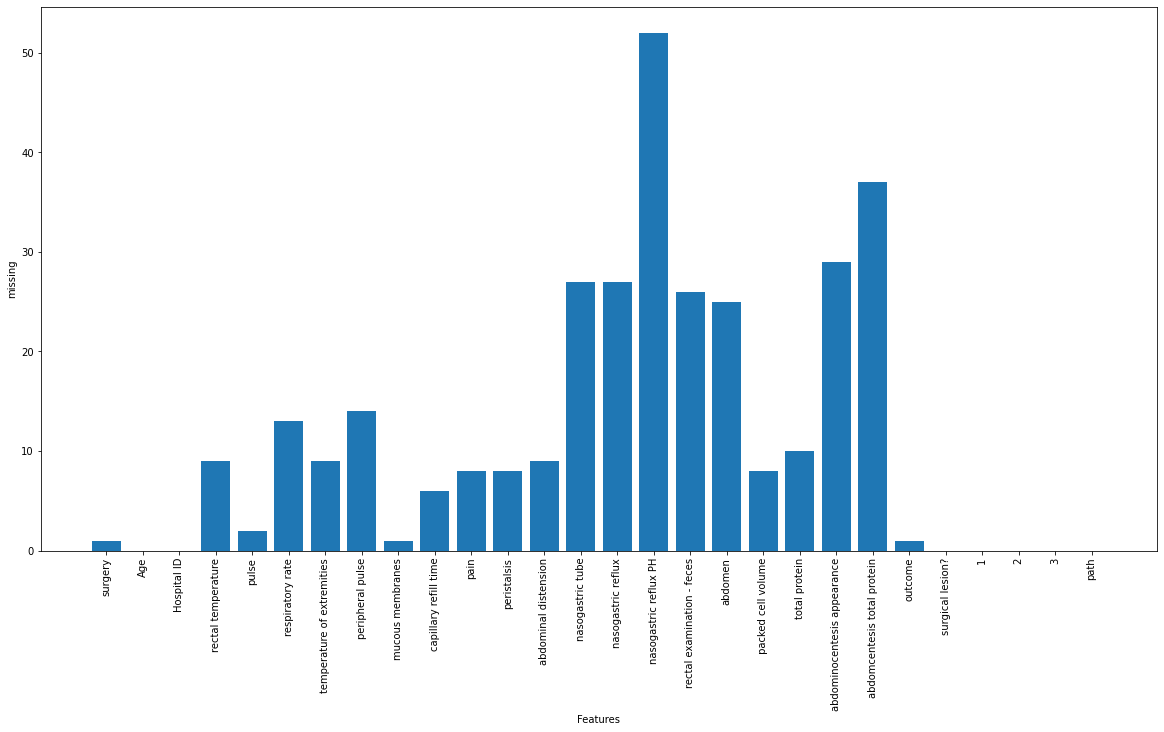

In [115]:
null = dfs.isnull().sum()

from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(range(len(null)),null)
plt.xlabel('Features')
plt.ylabel('missing')
plt.xticks(list(range(len(dfs.columns))), list(dfs.columns.values), rotation='vertical')
plt.show

print(null)

In [26]:
#Dropping columns with significant number of missing values
dfs.drop('nasogastric reflux PH', axis=1, inplace = True)
dfs.drop('abdomcentesis total protein', axis=1, inplace = True)
dfs.drop('abdominocentesis appearance', axis=1, inplace = True)
dfs.drop('nasogastric tube', axis=1, inplace = True)
dfs.drop('abdomen', axis=1, inplace = True)
dfs.drop('rectal examination - feces', axis=1, inplace = True)

Removing columns which have insignificant impact on our target variable "outcome" (corr<.9) as seen from Train dataset


In [ ]:
dfs.drop('path',axis = 1 , inplace = True)
dfs.drop('3',axis = 1 , inplace = True)
dfs.drop('rectal temperature',axis = 1 , inplace = True)
dfs.drop('pain',axis = 1 , inplace = True)
dfs.drop('mucous membranes',axis = 1 , inplace = True)

# Processing Test dataset before analysis

In [27]:
dfs['Age'].replace({9:2}, inplace = True)
dfs['outcome'].replace({1:'lived', 2:'died', 3:'euthenized'}, inplace = True)
dfs['Age'].replace({1:'Adult', 2:'Young'}, inplace = True)


In [28]:
null = pd.concat([dfs.isnull().sum()], axis = 1, keys = ['NA'] )
null.loc[(null.NA>0)]

,NA
surgery,1
pulse,2
respiratory rate,13
temperature of extremities,9
peripheral pulse,14
capillary refill time,6
peristalsis,8
abdominal distension,9
nasogastric reflux,27
packed cell volume,8


In [29]:
for col in dfs.columns.values:
    if (len(dfs[col].value_counts())> 5) and (dfs[col].isnull().sum() > 0):
        print(col)

pulse
respiratory rate
 packed cell volume
total protein


In [30]:
dfs['surgery'].fillna(dfs['surgery'].mode()[0], inplace = True)
dfs['pulse'].fillna(dfs['pulse'].mean(), inplace = True)
dfs['respiratory rate'].fillna(dfs['pulse'].mean(), inplace = True)
dfs[' packed cell volume'].fillna(dfs['pulse'].mean(), inplace = True)
dfs['total protein'].fillna(dfs['total protein'].mean(), inplace = True)

for col in dfs.columns.values:
    if (dfs[col].isnull().sum()>0):  
        if (dfs[col].dtype == 'float64'):
            dfs[col].fillna(df[col].mode()[0], inplace = True)

In [31]:
null = pd.concat([dfs.isnull().sum()], axis = 1, keys = ['NA'])
(null.loc[(null['NA']>0)])

,NA
outcome,1


In [32]:
dfs.dropna(axis=0, inplace =True)

In [33]:
dfs['outcome'] = dfs['outcome'].astype('category').cat.codes
dfs['Age'] = dfs['Age'].astype('category').cat.codes

In [34]:
#Separating features and target variable from both test and train dataset
xtrain = df.drop("outcome", axis=1)
ytrain = df["outcome"]
xtest  = dfs.drop("outcome", axis=1)
ytest  = dfs["outcome"]

In [35]:
xtrain.head()

,surgery,Age,Hospital ID,pulse,respiratory rate,temperature of extremities,peripheral pulse,capillary refill time,peristalsis,abdominal distension,nasogastric reflux,packed cell volume,total protein,surgical lesion?,1,2
0,2.0,0,530101,66.0,28.0,3.0,3.0,2.0,4.0,4.0,1.0,45.0,8.4,2,11300,0
1,1.0,0,534817,88.0,20.0,3.0,1.0,1.0,4.0,2.0,1.0,50.0,85.0,2,2208,0
2,2.0,0,530334,40.0,24.0,1.0,1.0,1.0,3.0,1.0,1.0,33.0,6.7,2,0,0
3,1.0,1,5290409,164.0,84.0,4.0,1.0,2.0,4.0,4.0,2.0,48.0,7.2,1,2208,0
4,2.0,0,530255,104.0,35.0,3.0,1.0,2.0,3.0,1.0,1.0,74.0,7.4,2,4300,0


# Data Analysis

In [36]:
#RandomForestClassifier Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=14 , n_jobs= -1)
from pprint import pprint
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 14,
 'verbose': 0,
 'warm_start': False}


In [37]:
#RandomizedSearchCV for best hyperparameter range
from sklearn.model_selection import RandomizedSearchCV
n_est=[100,140,180,220]
bootstrap = [True,False]
msl = [2,3,4]
mss=[1,2,3]
mf=[.5,1,'auto']
criterion = ['gini', 'entropy']
maxd=[10,15,20,30,40,None]


In [38]:
random_grid = {'n_estimators': n_est,
               'max_features': mf,
               'max_depth': maxd,
               'min_samples_split': mss,
               'min_samples_leaf': msl,
               'bootstrap': bootstrap,
               'criterion' : criterion}

In [39]:
pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 15, 20, 30, 40, None],
 'max_features': [0.5, 1, 'auto'],
 'min_samples_leaf': [2, 3, 4],
 'min_samples_split': [1, 2, 3],
 'n_estimators': [100, 140, 180, 220]}


In [40]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=14, n_jobs = -1)

In [41]:
rf_random.fit(xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Chandraraj Singh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   20.3s finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=14),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 15, 20, 30, 40, None],
                                        'max_features': [0.5, 1, 'auto'],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [100, 140, 180, 220]},
                   random_state=14, verbose=2)

In [42]:
rf_random.best_params_

{'n_estimators': 180,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 0.5,
 'max_depth': 15,
 'criterion': 'entropy',
 'bootstrap': True}

In [43]:
#GridSearchCV for finding better hyperparameters 
from sklearn.model_selection import GridSearchCV
grid_param= {'n_estimators':[150, 180, 200,300,500],
             'min_samples_split':[2,4,6],
             'min_samples_leaf': [1,2,3,4],
             'max_features': [0.5, 'auto'],
             'max_depth': [10,15,20],
             'criterion': ['entropy'],
             'bootstrap': [True]}

In [44]:
rf = RandomForestClassifier()

In [45]:
grid_search =  GridSearchCV(estimator = rf, param_grid = grid_param, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [46]:
grid_search.fit(xtrain, ytrain)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


C:\Users\Chandraraj Singh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['entropy'],
                         'max_depth': [10, 15, 20],
                         'max_features': [0.5, 'auto'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [150, 180, 200, 300, 500]},
             verbose=2)

In [47]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [126]:
#Random Forest Classifier Model
rf = RandomForestClassifier(n_estimators=300, criterion='entropy', min_samples_leaf=2,
                            min_samples_split=2, max_features='auto',
                            max_depth=10, bootstrap=True, n_jobs=-1)

In [127]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       n_estimators=300, n_jobs=-1)

In [128]:
rf.score(xtrain, ytrain)

0.9833333333333333

In [89]:
pred = rf.predict(xtest)

In [130]:
#Decision tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(xtrain, ytrain)

prediction = decision_tree.predict(xtest)

In [139]:
accuracy_dt= round(dt.score(xtrain, ytrain) * 100, 2)
accuracy_rf= round(rf.score(xtrain, ytrain) * 100, 2)
print("Accuracy of Random Forest Classifier is ",accuracy_rf,"%")
print("Accuracy of Decision Tree Classifier is ",accuracy_dt,"%")

Accuracy of Random Forest Classifier is  98.33 %
Accuracy of Decision Tree Classifier is  72.0 %


## We see that Random Forest provides a much more accurate model than Decision Tree!